## ```NoteBook Focus```
---
1. Figure out input and default variables.
    - Setting some input to a default setting will make the user interface less crowded.
2. Choose and save models that will be used for voting in the app.
    - Each model used will have a vote on whether the offender is recieving a prison sentence vs a non prison sentence. The class that recieves the most votes is the class predicted.
3. Build a for loop that returns the highest voted class and possibly the probability of our prediction.

## ```Imports```
---

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from classifiers_copy import classify

import pickle

import warnings
warnings.filterwarnings('ignore')

## ```Choosen Voting Models and Saving Them```
---

In [2]:
drugs = pd.read_csv('../Claire/data/drugs_2020_simply_imputed.csv')
drugs.head(2)

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0


1    16075
0      754
Name: prisdum, dtype: int64
1    16075
0    16075
Name: prisdum, dtype: int64
train acc: 0.999333481448567
test acc: 0.9539657853810264


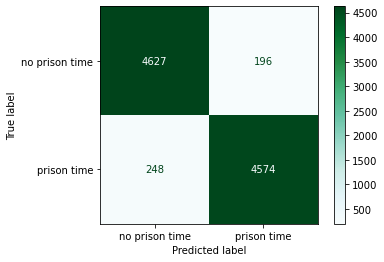

In [41]:
# set up X/y
X = drugs[[ 
            'accgdln', 'casetype', 'combdrg2', 'crimhist', 'disposit', 
            'district', 'dsplea', 'intdum', 'methmin', 'mweight','nodrug',
            'offguide', 'quarter', 'reas1', 'reas2', 'reas3', 'numdepen',
            'sources', 'statmax'
         ]]

y = drugs['prisdum']
print(y.value_counts())

# # boost minor class value count
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X,y)
print(y_smo.value_counts())

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test) 

# instantiate, train, evaluate
dt = DecisionTreeClassifier()
dt.fit(X_train_ss,y_train)

# evaluate
print(f"train acc: {dt.score(X_train_ss,y_train)}")
print(f"test acc: {dt.score(X_test_ss,y_test)}")
    
plot_confusion_matrix(dt, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time'])

1    16075
0      754
Name: prisdum, dtype: int64
1    16075
0    16075
Name: prisdum, dtype: int64
train acc: 1.0
test acc: 0.9591498185588387


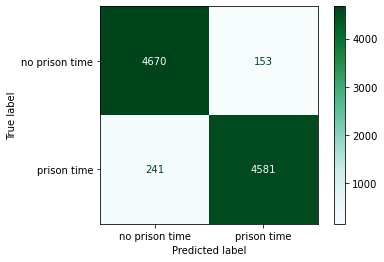

In [53]:
# Model with demogrpahics
# set up X/y
demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn','newcit', 'citwhere']
X = drugs[[ 
            'accgdln', 'casetype', 'combdrg2', 'crimhist', 'disposit', 
            'district', 'dsplea', 'intdum', 'methmin', 'mweight','nodrug',
            'offguide', 'quarter', 'reas1', 'reas2', 'reas3', 'numdepen',
            'sources', 'statmax'
         ]+demographic_columns]

y = drugs['prisdum']
print(y.value_counts())

# # boost minor class value count
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X,y)
print(y_smo.value_counts())

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test) 

# instantiate, train, evaluate
dt = DecisionTreeClassifier()
dt.fit(X_train_ss,y_train)

# evaluate
print(f"train acc: {dt.score(X_train_ss,y_train)}")
print(f"test acc: {dt.score(X_test_ss,y_test)}")
    
plot_confusion_matrix(dt, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time'])

In [63]:
classify(X_train_ss, X_test_ss, y_train, y_test)

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.942857,0.911457,0.031400,0.941889,0.909572,0.032317,0.958169,0.929251,0.028917,0.926153,0.890709,0.035444
logreg,0.821995,0.824054,0.002059,0.810250,0.812838,0.002588,0.867532,0.868080,0.000548,0.760064,0.764206,0.004142
dt,0.998978,0.957076,0.041902,0.998977,0.956749,0.042228,0.999733,0.964000,0.035733,0.998223,0.949606,0.048617
bag,0.997023,0.966822,0.030201,0.997020,0.966562,0.030458,0.998130,0.974094,0.024035,0.995912,0.959146,0.036767
bag_knn,0.945123,0.913116,0.032008,0.944181,0.911097,0.033084,0.960725,0.932667,0.028058,0.928197,0.890502,0.037695
bag_log,0.821462,0.824054,0.002592,0.809592,0.812590,0.002998,0.867296,0.869124,0.001827,0.759086,0.762961,0.003875
rf,0.998978,0.978434,0.020544,0.998978,0.978446,0.020532,0.999200,0.977838,0.021362,0.998756,0.979054,0.019702
et,0.998978,0.975739,0.023239,0.998977,0.975615,0.023362,0.999733,0.980519,0.019214,0.998223,0.970759,0.027464
ada,0.934770,0.937377,0.002607,0.934417,0.937031,0.002613,0.939538,0.942138,0.002600,0.929352,0.931978,0.002626
gboost,0.956676,0.957802,0.001126,0.956684,0.957609,0.000925,0.956557,0.961917,0.005360,0.956812,0.953339,0.003473


In [52]:
drugs[(drugs['mweight']<22_000) & (drugs['offguide']==9) & (drugs['prisdum']==1) & (drugs['district']==1)][['mweight','offguide','prisdum','statmin']]

,mweight,offguide,prisdum,statmin
4493,12950.0,9,1,0.0
10247,8927.5,9,1,0.0


**I wanted to see how many people in 2020 were convicted and given a prison sentence while having less than the legal limit of 50 pounds. We can see there have only been 2 prison sentences.**

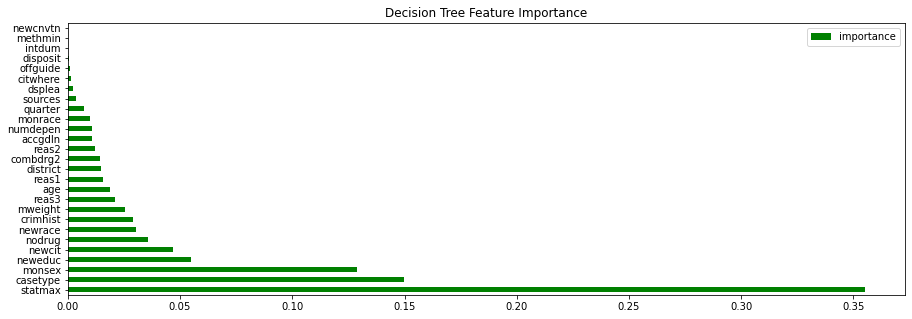

In [72]:
pd.DataFrame(dt.feature_importances_,X.columns, columns=['importance']).sort_values(by='importance', ascending=False).sort_values(by='importance', ascending=False).plot(kind='barh',figsize=(15,5), color='green')
plt.title('Decision Tree Feature Importance');

**When we run the model with demographic information, demographic features rank high on feature importance.**

## ```Training and Pickling Voting Models```
---

In [42]:
# Knn model for app
knn = KNeighborsClassifier()
knn.fit(X_train_ss,y_train)

with open('../carlos/app_models/knn.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(knn, pickle_out)

In [43]:
# Dt model for app
dt = DecisionTreeClassifier()
dt.fit(X_train_ss,y_train)

with open('../carlos/app_models/dt.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(dt, pickle_out)

In [45]:
# Rf model for app
rf = RandomForestClassifier()
rf.fit(X_train_ss,y_train)

with open('../carlos/app_models/rf.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(rf, pickle_out)

In [46]:
# Bagging model for app
bag = BaggingClassifier()
bag.fit(X_train_ss,y_train)

with open('../carlos/app_models/bag.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(bag, pickle_out)

In [47]:
# Extra Trees model for app
et = ExtraTreesClassifier()
et.fit(X_train_ss,y_train)

with open('../carlos/app_models/et.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(et, pickle_out)

## ```Function that takes all model votes and outputs the classification```
---

In [75]:
knn_vote = 0
dt_vote = 1
et_vote = 0
rf_vote = 1
bag_vote = 1

model_votes = [knn_vote,dt_vote,et_vote,rf_vote,bag_vote]
vote_1 = 0
for vote in model_votes:
    if vote == 1:
        vote_1+=1
    else:
        pass
    
if vote_1>=3:
    print(f"{dt.predict_proba(X)[0][0]*100}% chance of receiving a prison sentence after conviction.")
else:
    print(f"{dt.predict_proba(X)[0][1]*100}% chance of receiving a non-prison sentence after conviction!")


100.0% chance of receiving a prison sentence after conviction.


**The voting system works similar to the one we see above where each classifier predicts what the classification will be based on the provided input. If the majority vote is no prison sentence than that is what the lawyer uses to make decision on how to prioritize certain cases.**